## Integrating factors can solve differential equations

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots



### 4.1 Homogeneous equations

A homogeneous differential equation has the form

$$\displaystyle  Mdx + Ndy = 0$$

if $M$ and $N$ are functions of the _same degree_ in $x$ and $y$. This constraint means that $M/N$ is a function of $y/x$ and the homogeneous equation has the form

$$\displaystyle \frac{dy}{dx} = f\left(\frac{y}{x}\right)$$

where $f$ is the function of $y/x$. To solve this equation the substitution $y = ux$ is used. The derivative is 

$$\displaystyle \frac{dy}{dx} = u + x\frac{du}{dx}$$

then $\displaystyle u + x\frac{du}{dx} = f(u)$ which can have its variables separated to produce

$$\displaystyle \frac{du}{f(u)-u}=\frac{dx}{x}  \tag{11}$$

which is integrated to find the solution. 

The equation 

$$\displaystyle \frac{dy}{dx}=\frac{2x^2+3y^2}{xy} $$

satisfies the condition $Mdx + Ndy = 0$ because the degree of $xy, \; x^2$ and $y^2$ is the same, and is 2, on both on the top and bottom of $\displaystyle \frac{2x^2 + 3y^2}{xy}$. The function $f(u)$ then becomes 

$$\displaystyle f(u) = \frac{2x^2 + 3u^2x^2}{ux^2} = \frac{2 + 3u^2}{u}$$

and then the solution is found using equation (11) as 

$$\displaystyle \int\frac{u}{2(1+u^2)}du=\int\frac{dx}{x}$$

and which is, with $\ln(c)$ as the integration constant,

$$\displaystyle \frac{1}{4}\ln(1 + u^2) = \ln(x) + \ln(c)$$

and after substituting and rearranging, the general solution is 

$$\displaystyle  y = x\sqrt{c^4x^4-1}$$

Using SymPy produces the similar answer.

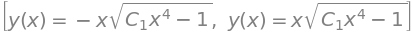

In [2]:
x, y = symbols('x, y')
y = Function('y')
f01 = diff(y(x),x)-(2*x**2 + 3*y(x)**2)/(x*y(x) )  # define equation , y is function of x 
ans = dsolve(f01)                                  # solve then factor answer
factor(ans)

### 4.2 Exact equations

The exact equation also has the form $Mdx + Ndy = 0$ with the additional constraint that 

$$\displaystyle \frac{\partial M}{\partial y} = \frac{\partial N}{\partial x}$$

and this type of equation is frequently met in Thermodynamics, see Chapter 12.8. 

If a differential equation  $\displaystyle Mdx + Ndy = 0$ , is multiplied throughout by a suitable term it can become exact; i.e. the equation is now

$$\displaystyle  (Mdx + Ndy)G(x, y) = 0$$

The term $G(x, y)$ is called an _integrating factor_ which in general can be difficult to uncover except in the case of linear first-order equations that are described next.

### 4.3 Linear first-order equations and Integrating Factors

Linear first-order equations have the form,

$$\displaystyle  \frac{dy}{dx} +Py = Q $$

where $P$ and $Q$ are functions of $x$ only. These equations can be integrated using integrating factors. First we consider the particular case when $Q = 0$ or

$$\displaystyle  \frac{dy}{dx} +Py = 0  \tag{12} $$

Writing the equation as $\displaystyle \frac{1}{y}dy +Pdx=0$ and integrating gives 

$$\displaystyle  \ln(y)+P\int dx=\ln(c)$$

where the constant is $\ln(c)$. Simplifying gives 

$$\displaystyle  ye^{\large{\int Pdx}} = c$$

If this equation is differentiated, it produces $\displaystyle \frac{d}{dx}ye^{\int Pdx} = 0$. From this result, it can be shown that

$$\displaystyle \frac{d}{dx}ye^{\large{\int Pdx}}=e^{\large{\int Pdx}}\left(\frac{dy}{dx}+Py  \right) $$

and the right-hand side is the starting equation (12), multiplied by the integrating factor 

$$\displaystyle G(x) = e^{\large{\int Pdx}}$$

It follows that the solution of the differential equation becomes the two integrals,

$$\displaystyle ye^{\large{\int Pdx}}=\int Qe^{\large{\int Pdx}}dx +c\tag{12}$$

#### (i) Example
The equation $\displaystyle \frac{dy}{dx} + \frac{y}{x}= 3\sin(x)$ is solved. 

In this equation $P = 1/x$ and $Q = 3\sin(x)$. The integrating factor is simple in this case and is 

$$\displaystyle \int Pdx=\ln(x)$$

and as $\displaystyle e^{\ln(x)}=x$ then $yx = 3\int x\sin(x)dx +c $.

Integrating this by parts and rearranging, produces 

$$\displaystyle  y = \frac{3\sin(x)}{x} - 3\cos(x) + c$$

and the constant is determined once the initial conditions are specified.

While this method is very useful, it does have its limitations particularly when $Q \ne 0$; for instance the similar equation 

$$\displaystyle \frac{dy}{dx} + xy = 3\sin(x)$$

has the integrating factor $\displaystyle e^{\large{\int xdx}}=e^{x^2/2}$. The solution is,

$$\displaystyle ye^{{x^2/2}}=3\int e^{{x^2/2}}\sin(x)dx+c$$

and the remaining integral is now a difficult one with the answer involving the error function.

#### (ii) Coupled chemical kinetic equations.
One particularly useful application of this method is to solve coupled kinetic equations. If a molecule reacts in a scheme 

$$\displaystyle A \stackrel {k_1} \longrightarrow B \stackrel  {k_2}\longrightarrow  C$$

the rate equations are easily written down,

$$\displaystyle \begin{align}
\frac{dA}{dt} &=-k_1A \\
\frac{dB}{dt}&=k_1A-k_2B \end{align}$$

If the initial amount of $A= A_0$ and $B_0 = 0$, then integrating the first equation gives $\displaystyle A = A_0e^{-k_1t}$ . Substituting this into the second and rearranging gives

$$\displaystyle  \frac{dB}{dt}+k_2B =k_1Ae^{-k_1t} $$

which has the form $\displaystyle \frac{dB}{dt}+PB=Q$ and can be solved using the integrating factor $\displaystyle e^{\large{\int Pdt}}=e^{k_2t}$ with the solution,

$$\displaystyle Be^{k_2t}=k_1A\int e^{k_2t-k_1t}dt+c$$

which is 

$$\displaystyle Be^{k_2t}=\frac{k_1A_0}{k_2-k_1} e^{k_2t-k_1t}dt+c$$

The initial conditions are $B = 0$ when $t = 0$ then 

$$\displaystyle B=\frac{k_1A_0}{k_2-k_1}\left(e^{-k_1t}-e^{-k_2t} \right) $$

and this has the expected form; it is zero when $t = 0$ and again when $t = \infty$ and passes through a maximum when $dB/dt = 0$.

### 4.4 The Bernoulli Equation 

The equation $\displaystyle \frac{dy}{dx} + Py = Qy^n $, 

where $P$ and $Q$ are functions of $x$ alone, is called the Bernoulli equation. If the integer $n = 1$ the equation is solved by separating variables in the usual way. If $n \ne 1$ the equation can be solved with an integrating factor with the substitution $\displaystyle y^{1-n} = u $.

Differentiating gives 

$$\displaystyle  \frac{(1-n)}{y^n}\frac{dy}{dx}=\frac{du}{dx}$$

and the equation becomes

$$\displaystyle \frac{du}{dx}+(1-n)Pu=(1-n)Q$$

The complicated equation $\displaystyle x\frac{dy}{dx}+y=x^2e^xy^2$ is seen to be of the Bernoulli form because if divided through by $x$ it becomes 

$$\displaystyle \frac{dy}{dx}+\frac{y}{x}=xe^xy^2$$

Comparing with the Bernoulli equation, $n = 2$ and with the substitution $u=1/y$ then 

$$\displaystyle \frac{du}{dx}-\frac{u}{x}=-xe^x$$

The integrating factor is $\displaystyle e^{\large{\int Pdx}}=1/x$ then 

$$\displaystyle \frac{u}{x}=-\int e^xdx\quad \text{ or }\quad \displaystyle u=-x(e^x+c)$$

Substituting back gives $\displaystyle y=-\frac{1}{x(e^x+c)} $

## 5 Second-order differential equations

### 5.1 Newton's laws and differential equations describing motion

Differential equations dominate the study of the motion of the planets and of molecules. In single molecules or in ensembles of them, molecular dynamics calculations rely on solving many simultaneous equations according to Newton's laws of motion, linked to potentials describing intermolecular interactions. 

Newton's laws are

**(i)**$\quad$ Every particle remains either in a state of rest or of constant speed in a straight line unless acted on by a force to change that state.

**(ii)**$\quad$ The rate of change of the momentum of a particle is proportional to the force acting on it and is in the direction of the force.

**(iii)**$\quad$ Action and reaction are equal and opposite.

The first law states that any acceleration experienced by a particle is caused by the action of an external force. The second law proposes that force $f$ is equal to the product of mass and acceleration since momentum is the product of mass and velocity;

$$\displaystyle  f = m \frac{d^2x}{dt^2} = m\frac{dv}{dt}$$

where $x$ is position, $v$ velocity, and $t$ time. The second law includes the first, for if the force is zero then so is the acceleration and the body must remain unchanged.

The third law asserts that if two particles exert forces on one another, the force exerted by the first on the second is equal to that exerted by the second on the first. This law can be used to define the mass of a particle.

Newton's law of gravity was formulated to understand the motion of the planets. It states that the force of attraction of two bodies is proportional to the product of their masses and the inverse square of their separation $r$,

$$\displaystyle  f = G\frac{m_1m_2}{ r^2}$$

where $G$ is the gravitational constant $6.673\cdot 10^{-11}\,\mathrm{N\, m^2\,kg^{-2}}$. This law of attraction takes a simpler form in the case of a small body falling to earth from heights that are small compared to its radius. In this case, $r\equiv R$, the radius of the earth,  is sensibly constant and the law becomes

$$\displaystyle f = mg$$

where the acceleration due to gravity is $g=GM/R^2 = 9.81\,\mathrm{ m \,s^{-2}}$ where $M$ is the mass of the (spherical) earth. Clearly, $g$ will be different on the moon to that on the earth. The differential equation for a body falling from a height $x$ under gravity, is therefore

$$\displaystyle  \frac{d^2x}{dt^2} = g$$

and is independent of the mass. The distance $x$ is positive in the downwards direction. Positive upwards would change $g$ into $-g$. If this equation is integrated once then

$$\displaystyle  \frac{dx}{dt} = gt + v_0 $$

where the integration constant $v_0$ is the initial velocity at $t$ = 0, and $v = dx/dt$ is the velocity at time $t$ producing the familiar equation $v = v_0 + gt$. 

Integrating again produces the distance travelled after a time $t$ from the starting or reference point $x_0$,

$$\displaystyle  x=\frac{gt^2}{2} +v_0t+x_0$$

This equation contains all the information about a freely falling body.

### 5.2 General Equation of Motion, Energy equation and Simple Harmonic Motion.

If the force is represented by $f(x)$ then different types of motion can be studied, for example motion under gravity or that due to extension of a spring which will lead to simple harmonic motion.

The simple harmonic motion is the most important form of periodic motion. It describes the _small_ angular oscillations of a pendulum as well as a good approximation to the vibrations of molecules, and this is called the harmonic oscillator model. A spring that hangs vertically with a mass attached to its end, a taut wire with a mass attached at it centre, or the oscillations of a ship or of a hydrometer, all follow simple harmonic motion, if the inertia of the spring, wire, or liquid is ignored. In this motion, the acceleration is proportional to the displacement of the particle from its central position. 

The general equation of motion is formed by equating force, as mass multiplied by acceleration, to the force $f(x)$ on the particle, such as given by Hooke's or some other law,

$$\displaystyle  m\frac{d^2x}{dt^2} = f(x)   \tag{13} $$

If the force is due to gravity, then $f (x) = mg$; if describing simple harmonic motion based on a small extension of a spring obeying Hooke's law, then $f(x) = -kx$ where $k$ is the force constant and in molecules this has values of a few hundred newton metres sec$^{-1}$ . 

This type of differential equation can be solved by multiplying both sides by $dx/dt$ which produces

$$\displaystyle m\frac{dx}{dt}\frac{d^2x}{dt^2}= f(x)\frac{dx}{dt}$$

and, although this does not look too promising, the left-hand terms are the derivative of $\displaystyle \left(\frac{1}{2}\frac{dx}{dt}\right)^2$, therefore integrating both sides gives

$$\displaystyle  \frac{m}{2}\left(\frac{dx}{dt}\right)^2=\int f(x)\frac{dx}{dt}dt+c =\int f(x)dx+c  \tag{14} $$

where $c$ is the constant of integration. This is the '_Equation of Energy_'; the left-hand side is the kinetic energy since $dx/dt$ is velocity and the right hand side is the potential energy. 

The time to reach position $x$ can also be found. First let $\displaystyle \int f(x)dx+c =F(x)$, then rearrange the energy equation to

$$\displaystyle \frac{dt}{dx}=\pm\sqrt{\frac{m}{2}}\frac{1}{\sqrt{F(x)}}$$

and integrate,

$$\displaystyle t=\pm\sqrt{\frac{m}{2}}\int \frac{dx}{\sqrt{F(x)}}+ c_1  \tag{15}$$

This equation contains two arbitrary constants, $c_1$ and $c$, of which $c$ is already included in $F(x)$. Two constants are needed because the acceleration has to be integrated twice.

The equation of energy can be obtained in a slightly different way if the velocity $v$ is required. Taking $x$ as the dependent variable and using 

$$\displaystyle \frac{dv}{dx} = \frac{dv}{dt}\frac{ dt}{dx}$$

equation (13) can be written as

$$\displaystyle  mv\frac{dv}{dx}=f(x)  \tag{16}$$

Integrating produces $\displaystyle \frac{mv^2}{2}=\int f(x)dx+c$ which is the same as equation 14.

The calculation can be completed when different types of forces are assigned to $f(x)$. Two examples are given, one for the motion of a rocket, another for simple harmonic motion.

#### (i) Rockets
At the end of section 3.5 the motion of a rocket launched vertically was examined. Figure 8b. shows plots of velocity and time vs distance away from the earth's surface. To calculate the distance moved in a given time equation 15 can be used. 

The equation to use is $\displaystyle \frac{dv}{dt}\equiv v\frac{dv}{dr}=-\frac{gR^2}{r^2}$ which leads to $\displaystyle F(r)= v_0^2 - 2gR+ \frac{2gR^2}{r}$. 

The integration is 

$$\displaystyle t=\int \frac{dr}{\sqrt{v_0^2 - 2gR+ 2gR^2/r} } +c$$

With $r$ as the variable the equation can be clarified if written as $\displaystyle \int \frac{ dr}{\sqrt{A+B/r}}$ where $A=v_0^2-2gR$ and $B=2gR^2$ are constants in the integration. The result is

$$\displaystyle t= \frac{1}{A}\left( \sqrt{Br}\sqrt{\frac{Ar}{B}+1 } -\frac{B}{\sqrt{A}}\sinh^{-1}\left( \sqrt{\frac{Ar}{B}} \right)  \right) +c$$

and the constant $c$ is evaluated as $r=R$ at $t = 0$. When the initial velocity is the escape velocity 

$$\displaystyle v_e=\sqrt{2gR}$$

then 

$$\displaystyle t=\frac{2}{3\sqrt{2gR^2}}\left( r^{3/2}-R^{3/2} \right)$$

Plots of $t$ vs $r$ are shown in fig 8b. Note that the inverse hyperbolic sine, $\sinh^{-1}(x)$, can also be written as 

$$\displaystyle \sinh^{-1}(x)=  \ln(x+\sqrt{x^2+1})$$ 

#### (ii) Hooke's Law and simple harmonic motion
In the case of a force in a line towards the origin that is a fixed point, simple harmonic motion ensues if the force is described by Hooke's law $f (x) = -kx$ where $k$ is the force constant and $x$ the displacement from the origin. The minus sign indicates that the force is towards the origin; when $\displaystyle d^2x/dt^2$ is negative $x$ is positive and vice versa. The equation of motion is now

$$\displaystyle  \frac{d^2x}{dt^2}=-\frac{k}{m}x $$

The frequency of vibration, or oscillation, is defined as $\displaystyle  \nu =\frac{1}{2\pi}\sqrt{\frac{k}{m}}\, \mathrm{s^{-1}}$ or as $\displaystyle \omega=\sqrt{\frac{k}{m}}$ and substituting this makes the equation of motion

$$\displaystyle  \displaystyle\frac{d^2x}{dt^2}=-\omega^2x \tag{17}$$

which when integrated gives $\displaystyle \left(\frac{dx}{dt}\right)^2=-\omega ^2x^2+c^2$ (see equation 14) and the constant is made $c^2$ as this has to be positive because the velocity $dx/dt$ must be a real not a complex number. Rearranging this equation to find the time gives

$$\displaystyle t=\int\frac{dx}{\sqrt{c^2-\omega^2x^2}}+c_1$$

which is a standard integral giving $\displaystyle t=\frac{1}{\omega}\sin^{-1}\left( \frac{\omega x}{c} \right) +c_1$. Thus 

$$ x=\frac{c}{\omega}\sin(\omega t-\omega c_1) $$

and the constants $c,\;c_1$ are determined by the initial conditions and as they are constants this equation can just as correctly be written as

$$\displaystyle  x=A\sin(\omega t+B) \tag{18} $$

be defining $A$ and $B$ as constants also fixed by the initial conditions. $B$ is called the _phase angle_ of the sine wave and $A$ is the _amplitude_. Some authors give a cosine solution but this differs only by the phase from the sine; $\sin(x) = \cos(x \pm \pi/2)$. Furthermore, by the properties of sine and cosine functions, we can also write

$$\displaystyle  x=\alpha\sin(\omega t)+\beta\cos(\omega t) \tag{19}$$

where $\alpha$ and $\beta$ are new constants but still determined by the initial conditions.
If the initial velocity is $v_0$ and the position $x_0$ at $t$ = 0, then from (19) $x_0 = \beta$ and

$$\displaystyle v=\frac{dx}{dt}=\alpha\omega\cos(\omega t)-\beta\omega\sin(\omega t) $$

which produces $\nu_0=\alpha\omega$, thus 

$$\displaystyle  x=\frac{v_0}{\omega}\sin(\omega t)+x_0\cos(\omega t) \tag{20}$$

and is dimensionally correct since $v_0/\omega$ has dimensions of distance. This equation completely describes simple harmonic motion.

The average value of the displacement $x$ over time of one or many whole vibrations should be zero. To prove this the equation needed is the displacement, such as eqn 18, and the time taken from zero to one period $t_0=1/v$ where $v$ is the frequency. Recall that $\omega =2\pi v$ and $B$ is a constant. 

$$\displaystyle \langle x\rangle =\frac{\displaystyle \int_0^{t_0} xdt}{\displaystyle\int_0^{t_0} dt}=v\int_0^{t_0} A\sin(\omega t+B)$$

Evaluating the integral gives 

$$\displaystyle \langle x\rangle =-Av\cos(2\pi v t+B)\Big|_0^{1/v} = A(\cos(2\pi+B)-\cos(B) )=0$$

because $\cos(2\pi+B)=\cos(2\pi)\cos(B)-\sin(2\pi)\sin(B)=\cos(B)$.

The average of the square of the displacement is not zero and is

$$\displaystyle \langle x^2\rangle =\frac{\int_0^{1/v} x^2dt}{\int_0^{1/v} dt}=v\int_0^{1/v} A^2\sin^2(\omega t+B)dt=\frac{A^2v}{2}\int_0^{1/v} (1-\cos(4\pi v t+2B)dt=\frac{A^2}{2}$$

using $\cos(2\theta)=1-2\sin^2(\theta)$ to simplify the integration. The integral using python/Sympy is 

In [3]:
t,v,B,A = symbols('t,v,B,A', positive = True )

ans = integrate(A**2* v*( 1-cos(4*pi*v*t+2*B  ) )/2,(t,0,1/v) )
simplify(ans)

The square displacement gives the (time averaged) average potential (or displacement) energy as $V=kA^2/4$ obtained by integrating the force from Hook's law $f(x)=-kx$. The (time averaged) average kinetic energy has the same value because the total energy is $E=kA^2/2$ where $A$ is the maximum displacement which is at the turning point. 

The probability of being at position $x\to x+dx$ can be found from the total energy by representing this as the sum of kinetic and potential parts. At extension $x$  kinetic part is effectively $mv^2/2$ for velocity $v$ and the potential $kx^2/2$. Thus

$$\displaystyle \frac{m}{2}\left( \frac{dx}{dt}\right)^2+\frac{k}{2}x^2= \frac{k}{2}A^2$$

Separating out the derivative produces

$$\displaystyle \frac{dx}{dt}=\sqrt{\frac{k}{m}\left(A^2-x^2 \right)}=2\pi v\sqrt{A^2-x^2}$$

and isolating $dt$ gives

$$\displaystyle dt=\frac{1}{2\pi v\sqrt{A^2-x^2}} dx $$

which means that the time spent within limits $x\to x+dx$ depends on $dx$ of the range considered. The probability of being at position $x \to x+dx$ is this value as a fraction of the period $1/v$ this 

$$\displaystyle pdx = \frac{1}{\pi \sqrt{A^2-x^2}} dx $$

This means that as $x\to \pm A$ the probability increases rapidly towards 1 but is small when $x<A$. The oscillator is always confined within the potential. The probability has an approximately U shaped profile and contrasts sharply with that of the quantum harmonic oscillator.

![Drawing](diffeqn-fig11b.png)

Fig 11b Classical and quantised probability in a harmonic potential.
__________
The figure shows the classical probability together with a harmonic potential such as for a diatomic molecule. The potential has a force constant of $172$ N/m and the first quantised energy level is shown at energy $E_1$. The square of the wavefunction is also shown. The classical probability extends only as far as the turning points at energy $E_1$. The difference between the probabilities is quite considerable not in their overall size but in their shape. The classical probability cannot extend past the turning point, but the quantised probability does so quite considerably. At large quantum numbers, e.g. $20$ the wavefunction has more probability close to the turning points, than in the middle of the potential and so resembles the classical behaviour a little more closely.

#### (iii) Springs

Problems with springs often state that the spring has a weight attached, which causes the spring to extend by a certain amount. It is then extended or compressed by a further amount and let go. The equation of motion is then sought.

As a specific example, suppose that a helical spring has a mass of $2$ kg attached to it and this extends it by $5$ cm. It is then displaced by $3$ cm from its new equilibrium position and let go. At equilibrium, before the mass is moved, the tension in the spring due to Hooke's law is balanced by the force of gravity; $mg = ks$ where $s$ is the displacement from equilibrium before the mass is moved. If the spring is now extended by $x$ the tension $T$ increases to $k(s + x)$. As the spring has no forces acting on it other than gravity, the force equation is

$$\displaystyle m\frac{d^2x}{dt^2} = mg - T$$

The tension is $T = k(x + s)$ and as $mg = ks$ then $\displaystyle m\frac{d^2x}{dt^2} = -kx$, which is the same as equation (17) and has the solution (20) when the frequency squared is substituted for $k/m$. To evaluate this equation, the oscillation frequency must be found, as must $x_0$ and $v_0$, which are set by the initial conditions.
As $v_0 = 0$, when the mass is let go (it is not pushed), then the solution is immediately given by

$$\displaystyle  x = x_0 \cos(\omega t)$$

If the initial displacement is above the equilibrium position $x_0 = -3$, therefore $x = -3\cos(\omega t)$. Finally, the frequency is found from Hooke's law. At equilibrium, $mg = ks$ and $s = 5$ is the displacement from equilibrium before the mass is moved. Therefore, the force constant $k = 2 \cdot 9.81/5\,\mathrm{ N \,m^{-1 }}$ and the frequency squared is $\omega^2 = k/m$ or $\omega = 1.4\,\mathrm{ rad\, s^{-1}}$. This corresponds to a natural frequency of $\nu = \omega /2\pi$ or $0.223\,\mathrm{ s^{-1}}$ and period $T = 1/\nu = 4.49$ seconds. The position of the mass at any time $t$ is found to be $x = -3 \cos(1.4t)$. Note that if the question stated that the _weight_ was 2 kg then this would correspond to $mg$ not $m$ and the mass to use would therefore be $2/9.81$ kg.

#### (iv) Total energy

The total energy is the sum of the kinetic and potential energy and is a constant if no external force acts on the system. The kinetic energy is that due to motion $mv^2/2$, and the potential energy can take several forms depending on how the motion is achieved. On extending a spring, the potential energy is force multiplied by distance displaced and the force is given by Hooke's law. If the potential energy is that due to displacing a mass in a gravitational field, as occurs with a pendulum, then the potential is $mgh$ where $h$ is the height change.

If the displacement at time $t$ is $x = A \sin(\omega t + B)$, then the kinetic energy is

$$\displaystyle  KE=\frac{m}{2}\left(\frac{dx}{dt}  \right)^2=\frac{m}{2}A^2\omega^2\cos^2(\omega t+B) $$

The potential energy determined by Hooke's law force is linearly proportional to extension and is

$$\displaystyle  V=k\int_0^x xdx=\frac{1}{2}kx^2=\frac{k}{2}A^2\sin^2(\omega t+B)$$

As $\displaystyle \omega^2 = k/m$ the total energy, the sum of the potential and kinetic terms, is $\displaystyle E=\frac{k}{2}A^2$ which is a constant.

### 5.3 The simple pendulum

The pendulum will consist of a light rigid rod with a mass $m$ at its end; the pivot holding the pendulum is frictionless and no air or other resistance hinders the motion. The variable $\varphi$ is the angle in radians away from the vertical; Fig. 11. It is found that the pendulum's angular frequency is 

$$\displaystyle \omega = \sqrt{g/L}\quad\mathrm{ rad \,s^{-1}}$$

if $g$ is the acceleration due to gravity and $L$ the pendulum's length. The mass of the pendulum $m$ is used to calculate forces but cancels out in the result. The equation of motion can be derived in a number of different ways; here we make the inertial force of the moving pendulum equal to the applied force due to gravity, $F_{in} = F_{res}$.

The inertial force $F_{in}$ is found quite easily in terms of the angle $\varphi$ as follows. The pendulum travels a distance $(2\pi L)(\varphi/2\pi ) = L\varphi$ around the circumference to reach an angle $\varphi$; its acceleration is therefore $\displaystyle L\frac{d^2\varphi}{dt^2} $ and the inertial force $F_{in}$, is $m$ times this since force is mass $\times$ acceleration.

The restoring force $F_{res}$, is the projection of the gravitational force, acting vertically down on the line of travel of the pendulum and is $-mg \sin(\varphi )$. The normal component of the force acts along the pendulum's arm.

![Drawing](diffeqn-fig11.png)

Fig. 11 The geometry used to calculate the forces acting on the pendulum.
____

Equating forces produces, $\displaystyle mL\frac{d^2\varphi }{dt^2}=-mg\sin(\varphi)$ which, by cancelling the mass and substituting for $\omega$, produces the equation of motion

$$\displaystyle  \frac{d^2\varphi }{dt^2}=-\omega^2\sin(\varphi)$$

It is worth noting in passing that mass, inertial and gravitational, cancels in this equation so that the period depends only on the length of the pendulum and the force of gravity. There appears to be no reason why the inertial mass has to be the same as gravitational mass, but it is. Galileo, it is thought, first realized this by dropping different masses of the same size from the leaning tower of Pisa and observing that they struck the ground at the same time. Einstein did not ignore the equality of the inertial and gravitational mass, but developed this into a theory of gravity known as the General Theory of Relativity.

When the angular displacement is small, $\sin(\varphi) \to \varphi$, which means that $\varphi \lt 0.15$ rad or $\approx 8^{\mathrm{o}}$, the pendulum's motion becomes a simple harmonic oscillator of frequency $\omega$. The equation of motion is 

$$\displaystyle \frac {d^2\varphi}{dt} = -\omega^2\varphi$$

which has the general solution

$$\displaystyle  \varphi (t)=\varphi_0\cos(\omega t)+\frac{\nu_0}{\omega}\sin(\omega t)  \tag{21}$$

as calculated in equation (20) but with $\varphi$ (in radians) instead of $x$ as displacement. The initial angle is $\varphi_0$ from the vertical and initial velocity $\nu_0$ rad s$^{-1}$.

If the angular displacement is not small then the problem becomes rather more difficult, and after some effort (Arkfen 1970) an elliptical integral is produced with which the period can be calculated but which has to be evaluated numerically. The numerical integration of the pendulum's equation of motion for any displacement is somewhat easier and is examined in Chapter 11.6.3.

###  5.4 The compound pendulum and torsional oscillations

The compound pendulum is a rigid body freely suspended from a point that is not its centre of gravity and allowed to oscillate. The equation of motion is

$$\displaystyle I\frac{d^2\theta}{dt^2}=-mgh\sin(\theta)$$

where $I$ is the moment of inertia of the body about the axis of suspension, $m$ its mass, and $h$ the distance from the centre of gravity to the point of suspension. This is the same equation as for a simple pendulum of length $L \equiv I/(mh)$.

If a disc is suspended by a wire attached to its centre and twisted in the horizontal plane, torsional oscillations occur. The elasticity of the wire produces resistance to twisting and provides the restoring force. An angular displacement of $\theta$ radians produces a force of $k\theta /L$ if the wire is of length $L$. The constant $k$ is the _torsional modulus_ of the wire. This can be related to the rigidity of the material comprising the wire and its geometry. The equation of motion is 

$$\displaystyle I \frac{d^2\theta}{dt^2} = - k\theta/L$$

where $I$ is the moment of inertia of the mass about its point of suspension. Henry Cavendish (Philosophical Transactions, 1798, v 17 p 469, Royal Society London) used a torsional pendulum in his famous experiment to measure the gravitational constant. 

### 5.5 Inverted pendulum: unstable equilibrium

In the normal pendulum, acceleration is towards the vertical or origin of the motion. In the inverted pendulum with a rigid rod instead of a wire, acceleration is away from the vertical and the motion is unstable. The equation of motion for small displacements from the vertical, is similar to that of the pendulum but with a positive sign on the right-hand side of the equation,

$$\displaystyle \frac{d^2x}{dt^2}=n^2x  \tag{22}$$

and $n$ is a constant. The horizontal component of the thrust outwards is $mgx/L$, provided _x) is small; the constant is therefore $n^2 = g/L$. The solution for angular position is

$$\displaystyle \varphi = Ae^{nt}+Be^{-nt} \tag{23}$$

where $A$ and $B$ are constants determined by the initial conditions. The general method of solution is given in Section 4.3. If the initial position is $x_0$ and velocity $\nu_0$, then $\varphi_0 = A + B$ and $\nu_0 = n(A - B)$. Changing the exponentials into hyperbolic sinh and cosh and substituting for the constants gives 

$$\displaystyle \varphi=\varphi_0\cosh(nt)+\frac{\nu_0}{n}\sinh(nt)$$

which may be compared with equation 21.

### 5.6 Simple harmonic motion with a constant force

If a particle is attracted to the origin of set of coordinates, and subject to a further constant force $W$, the equation of motion takes the form based on equation (13),

$$\displaystyle m\frac{d^2x}{dt^2}=f(x)+W$$

If a spring is displaced, then the force is $f(x) = -kx$ at extension $x$, and the equation of motion is 

$$\displaystyle  m\frac{d^2x}{dt^2}=-kx+W$$

If this is re-written as $\displaystyle \frac{d^2x}{dt^2} = -\omega^2x+\frac{W}{m}$ and then as,

$$\displaystyle  \frac{d^2}{dt^2}\left(x-\frac{W}{m\omega^2}  \right) +\omega^2\left(x-\frac{W}{m\omega^2}  \right)=0$$

then it has the form of (13) with a displacement about a new equilibrium position $W/(m\omega ^2)$ rather than zero. This is understandable since a constant force is applied to the mass which must displace it by a constant average amount even though it is oscillating. The position at time $t$ is therefore obtained directly from equation (20) as

$$\displaystyle x-\frac{W}{m\omega^2}=\frac{\nu_0}{\omega}\sin(\omega t)+x_0\cos(\omega t)$$

if $x_0$ and $\nu_0$ are the initial position and velocity. The frequency $\omega$ is the same whether the constant force is present or not.

### 5.7 Particle in a one-dimensional box

Two quantum mechanical problems that can easily be solved using the methods just described are a particle (electron, proton, C60) in a one-dimensional box and a particle on a ring. Both involve integrating the Schroedinger equation, as must always be the case in quantum mechanics, but because the potential energy is zero the equations are considerably simpler than, say, that for the hydrogen atom or the harmonic oscillator. The one-dimensional Schroedinger equation in its general form is

$$\displaystyle -\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi $$

where $V(x)$ is the potential energy, $m$ the mass of the particle and $E$ the total energy. The length of the box is $L$. In the box, $V(x) = 0$ and additionally the boundary conditions are that the wavefunction $\psi$, which is a function of position $x$, is zero, i.e. always  has a node at the ends of the box; the sides of the box are vertical and assumed to be infinitely high so the particle cannot tunnel into the walls. The equation to solve is

$$\displaystyle \frac{d^2\psi}{dx^2}+\omega^2\psi=0, \qquad \omega^2=\frac{2mE}{\hbar^2} $$

and the solution can be written down directly from equation (19) and is 

$$\displaystyle  \psi = \alpha \sin(\omega x) + \beta \cos(\omega x)$$

where $\alpha$ and $\beta$ are constants. 

The boundary conditions are that $\psi = 0$ at both $x$ = 0 and at $x = L$, but these are not sufficient to enable both arbitrary constants in the problem to be calculated. To obtain both, the wavefunction has also to be normalized. First we simplify the general solution then normalise the wavefunction. When $x$ = 0 then we must make $\beta = 0$ and therefore $\psi = \alpha \sin(\omega x)$ because the cosine would not have a node at the wall so is physically unacceptable. When $x = L$, then $\alpha \sin(\omega L) = 0$ and as $\alpha$ cannot be zero as well as $\beta = 0$ (the wavefunctions would then always be zero), then it follows that $\omega L = n\pi $ where $n$ is an integer. The wavefunctions are therefore

$$\displaystyle \psi_n = \alpha \sin\left(\frac{n\pi x}{L} \right)$$

When $n$ = 0 then $\psi = 0$, which is not a physically acceptable solution. Positive and negative integers $n$ each produce acceptable solutions, but they are not independent of one another; therefore $n = 1, 2, 3, \cdots$ are used to give unique solutions. As the sine function is periodic, increasing $n$ means that waves with smaller periods can fit into the same box; the $n^{th}$ wavefunction has $n$ − 1 nodes between the walls, the lowest wavefunction having no nodes is just half a sine wave.

The constant $\alpha$ can be obtained by using the normalization condition $\displaystyle N^2\int_0^L \psi_n^*\psi_n dx = 1$ and then $N = 2/L$ . The normalized wavefunctions are

$$\displaystyle \psi_n = \sqrt{  \frac{2}{L} } \sin\left(\frac{n\pi x}{L}\right)  \qquad n=1,2,3,\cdots  \tag{24}$$

The energy of the $n^{th}$ energy level is found by putting $\psi_n$ back into the Schroedinger eqn. and is

$$\displaystyle E_n=\frac{\hbar^2}{2m}\left( \frac{n\pi}{L} \right)^2  \qquad n=1,2,3,\cdots \tag{25}$$

which has units of joules. This equation means that there are $n$ energy levels, one for each wavefunction, and so $E$ is labelled with this quantum number as $E_n$. Notice that the energy is never zero because there is a zero-point energy in accord with the Heisenberg uncertainty principle. The box is of finite length and the particle is thus in a restricted region of space. However, we cannot determine exactly where it is in this region and at the same time know its momentum; the condition is $\Delta x\Delta p \ge \hbar/2$ where $\Delta x$ is the uncertainty in position and $\Delta p$ that in momentum. The uncertainty in position is given by its standard deviation 

$$\displaystyle \Delta x=\sqrt{\langle x^2\rangle-\langle x \rangle^2}$$

and that in momentum 

$$\displaystyle \Delta x=\sqrt{\langle p^2\rangle-\langle p \rangle^2}$$

The value $\langle x\rangle$ is the _expectation_ (or average value) of the operator $x$, and $\langle x^2\rangle$ that for the operator $x^2$. The operator for momentum is $\displaystyle -i\hbar \frac{d}{dx}$.

In general the expectation value of an operator $Q$ is calculated as (see chapter 4.8).

$$\displaystyle Q=\frac{\int\psi^*Q\psi dx}{\int\psi^*\psi dx} $$

Evaluating the integrals produces $\displaystyle \Delta x\Delta p =\frac{n\pi}{\sqrt{3}}\frac{\hbar}{2}$ which is clearly greater than $\hbar/2$ as $n>0$.

![Drawing](diffeqn-fig11a.png)

Figure 11a. Energy levels and wavefunctions for a particle in a box. The mass used was that for an electron and the box is $1$ nm in length. Notice how the energy levels move apart as $n$ increases and how the number of nodes in the wavefunction also increases. A one dimensional box very approximately simulates a linear polyene, such as octatetraene.
_________

### 5.8 The Rigid Rotor and a Particle on a Ring

If the distance between two atoms is fixed, or if a particle is constrained to move on a circle, then the Schroedinger equation takes a simple form and the equation is essentially the same as for a harmonic oscillator. To describe motion in more than one dimension, the Schroedinger equation has coordinates in $x$ and $y$ if two dimensional, or $x$, $y$, and $z$ if the motion is three dimensional. Ratner & Schatz (2001) give a clear description of this problem and others in quantum mechanics relevant to Chemistry.

The equation for two-dimensional motion is

$$\displaystyle -\frac{\hbar^2}{2m}\left(  \frac{\partial ^2\psi}{\partial x^2}+\frac{\partial ^2\psi}{\partial y^2}\right) +V(x,y)\psi=E\psi $$

which is a partial differential equation and is clearly rather complicated. First, to simplify the calculation, the rigid rotor or particle on a ring have zero potential energy so $V= 0$. It only remains to simplify the derivatives and this is done with a change to plane polar coordinates using (see Chapter 1 section 7)

$$\displaystyle  x=r\cos(\theta) \qquad y=r\sin(\theta) \qquad r^2=x^2+y^2 $$

The differential operator 

$$\displaystyle \nabla^2 =\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}$$

is also changed into $r,\;\theta$ coordinates which gives 

$$\displaystyle \nabla^2 =\frac{\partial^2}{\partial r^2}+\frac{1}{r}\frac{\partial}{\partial r}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}$$

(see question 3.114). Substituting produces

$$\displaystyle -\frac{\hbar^2}{2m}\left(\frac{\partial^2}{\partial r^2}+\frac{1}{r}\frac{\partial}{\partial r}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}\right) \psi +V(r)\psi = E\psi \tag{26} $$

The term in $\theta$ describes the angular motion, and the other terms in $r$, the radial motion. In a rigid rotor or a particle on a ring, the radial part is constant which means that this part of the kinetic energy can be omitted, and as the potential energy $V$ is only a function of $r$ it is also a constant and can be ignored. Only the angular parts remain. 

There are two boundary conditions because the equation has second derivatives. Because the motion is circular, these conditions are (i) any wavefunction must have the same value after $2\pi$ (360$^\mathrm{o}$) rotation, or multiples of this, and (ii) that it has the same slope at this point. This means that the wavefunction repeats itself without a discontinuity see Fig. 10.26. The equation is now simplified using $\varphi$ to represent the angular part of the wavefunction and $k^2=2mr^2/\hbar^2$ ,

$$\displaystyle -\frac{\hbar^2}{2m}\frac{1}{r^2}\frac{\partial^2\varphi}{\partial \varphi^2}=E\varphi \qquad \text{ or } \qquad \frac{\partial^2\varphi}{\partial \varphi^2}=-k^2\varphi$$

The distance $r$ is a constant, by definition for the rigid rotor, and $mr^2$ is the moment of inertia $I$ making $k^2 = 2IE/\hbar^2$ and the energy is

$$\displaystyle E=\frac{\hbar^2k^2}{2I}$$

The solution to the differential equation can be written down either as the sum of a sine and cosine or as exponentials. The latter is conventionally chosen making the solution

$$\displaystyle \varphi =Ae^{ik\theta}+Be^{-ik\theta}$$

The boundary conditions are that the wavefunction must reproduce itself exactly after $2\pi$ radians, or $\varphi(\theta) = \varphi(2\pi + \theta)$. This condition means that

$$\displaystyle Ae^{ik\theta}+Be^{-ik\theta} =Ae^{ik(2\pi+\theta)}+Be^{-ik(2\pi +\theta)}$$

which will be true for any $A$ and $B$ if $\displaystyle e^{ik\theta} = e^{−ik\theta} = 1$. This condition means that $k$ must be an integer with values $k = 0,\,\pm 1, \,\pm$ 2, $\cdots$. Conventionally the solution $\displaystyle \varphi =Ae^{ik\theta}$ is chosen and using the normalizing condition $\displaystyle N^2\int_0^{2\pi}\varphi^*\varphi d\theta=1$, the wavefunction is;

$$\displaystyle \varphi=\frac{1}{\sqrt{2\pi}}  e^{ik\theta} \tag{27}$$

The quantum numbers are $k = 0, \pm 1, \pm 2, \cdots$ and as the lowest value is zero, this means that the minimum energy is zero and the rotor is stationary. As $k \ne 0$ can be positive or negative it indicates that the rotor moves to the right or left and that these levels are each doubly degenerate. 

As the lowest energy is zero it initially suggests that the Heisenberg uncertainty principle $\Delta \theta \Delta p \ge \hbar/2$ is not obeyed. However, when $J = 0$ the wavefunction is a constant, $1/ (2\pi)$, so we cannot know what angle the rotor has and this means that $\Delta \theta \Delta p  \ne 0$. 